### Text Analysis on 800-53 Mapping

Sources:

https://practicaldatascience.co.uk/machine-learning/how-to-preprocess-text-for-nlp-in-four-easy-steps
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [112]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from operator import itemgetter
nlp = spacy.load('en_core_web_sm')

In [74]:
data = pd.read_csv("800-53 Mapping Mar 1.csv")
data.head()

,Identity,Device,Network/Environment,Application Workload,Data,ZT Control Family,Primary Function,Secondary Function,ZT Control Function,ZT Control Maturity Rating,Comments,Control Identifier,Control (or Control Enhancement) Name,Control Text,Discussion,Related Controls
0,NaN,NaN,0,0,0,Multiple,NaN,NaN,Governance,Traditional,AC policies can relate to multiple pillars - i...,AC-1,Policy and Procedures,"a. Develop, document, and disseminate to [Assi...",Access control policy and procedures address t...,"IA-1, PM-9, PM-24, PS-8, SI-12 ."
1,1.0,0.0,0,0,0,Identity,NaN,NaN,All,Traditional,NaN,AC-2,Account Management,a. Define and document the types of accounts a...,Examples of system account types include indiv...,"AC-3, AC-5, AC-6, AC-17, AC-18, AC-20, AC-24, ..."
2,1.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Optimal,NaN,AC-2(1),Account Management | Automated System Account ...,Support the management of system accounts usin...,Automated system account management includes u...,None.
3,0.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Advanced,NaN,AC-2(2),Account Management | Automated Temporary and E...,Automatically [Selection: remove; disable] tem...,Management of temporary and emergency accounts...,None.
4,0.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Traditional,NaN,AC-2(3),Account Management | Disable Accounts,Disable accounts within [Assignment: organizat...,"Disabling expired, inactive, or otherwise anom...",None.


In [75]:
# Create control text dataframe for each pillar
identity_df = data.loc[data['Identity '] == 1][["Control Text"]] # remove the space after 'Identity' for new data
device_df = data.loc[data['Device'] == 1][["Control Text"]] 
net_env_df = data.loc[data['Network/Environment'] == 1][["Control Text"]]
app_workload_df = data.loc[data['Application Workload'] == 1][["Control Text"]]
data_df = data.loc[data['Data'] == 1][["Control Text"]]

In [76]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Claire\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
def tokenize(column):
    """
    Tokenizes a Pandas dataframe column and returns a list of tokens.
    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [80]:
def remove_stopwords(tokenized_column):
    """
    Return a list of tokens with English stopwords removed. 
    """
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]

In [81]:
def apply_stemming(tokenized_column):
    """
    Return a list of tokens with Porter stemming applied.
    """

    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in tokenized_column]

In [82]:
def lemmatizer(tokenized_column):
    '''
    Return a list of tokens with lemmatizer applied.
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    return [wordnet_lemmatizer.lemmatize(word) for word in tokenized_column]

In [83]:
def rejoin_words(tokenized_column):
    """Rejoins a tokenized word list into a single string. 
    
    Args:
        tokenized_column (list): Tokenized column of words. 
        
    Returns:
        string: Single string of untokenized words. 
    """
    
    return (" ".join(tokenized_column))

#### Identity

In [84]:
identity_df['Control Text']= identity_df['Control Text'].apply(lambda x: x.lower())
identity_df['tokenized'] = identity_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
identity_df['stopwords_removed'] = identity_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
identity_df['porter_stemmed'] = identity_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
identity_df['msg_lemmatized'] = identity_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
identity_df['rejoined_stem'] = identity_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
identity_df['rejoined_lem'] = identity_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [106]:
with open('identity_text.txt', 'w') as f:
    f.write(identity_df['rejoined_lem'].str.cat())

In [107]:
identity_text = open('identity_text.txt', encoding="utf8").read()

In [108]:
parsed_identity_text = nlp(identity_text)

In [113]:
identity_histogram = Counter()
for token in parsed_identity_text:
    original_token_text = token.orth_
    identity_histogram[original_token_text] += 1
    

identity_sorted_token_count_pairs = sorted(identity_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in identity_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 105
access : 41
system : 36
policy : 36
individual : 34
information : 34
role : 27
personnel : 24
account : 22
security : 22
processing : 20
personally : 18
identifiable : 18
user : 17
authenticator : 17
procedure : 16
control : 16
subject : 15
organizational : 15
time : 14
frequency : 14
following : 13
object : 12
document : 11
period : 11
b : 11
authentication : 10
within : 9
group : 9
authorization : 9
attribute : 9
one : 9
mechanism : 9
privilege : 8
change : 8
management : 8
selection : 8
purpose : 8
use : 7
require : 7
review : 7
compliance : 7
requirement : 7
process : 7
associated : 7
applicable : 7
notify : 6
changing : 6
audit : 6
standard : 6
guideline : 6
update : 6
monitoring : 6
identification : 6
service : 6
device : 6
based : 5
termination : 5
transfer : 5
manage : 5
specified : 5
requiring : 5
accessing : 5
action : 5
accountability : 5
responsibility : 5
consistent : 5
law : 5
executive : 5
order : 5
directive : 5
regulation : 5
facilitate : 5
official : 

Text(0.5, 1.0, 'Identity')

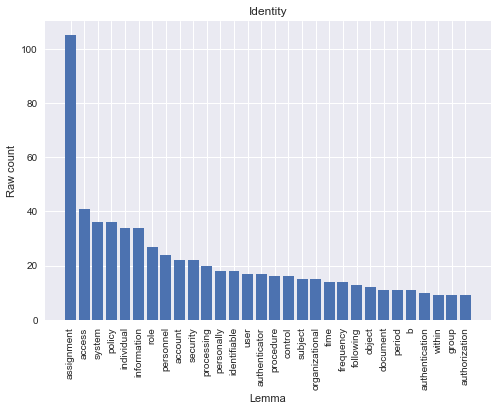

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in identity_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in identity_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts)
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Identity")

#### Device

In [118]:
device_df['Control Text']= device_df['Control Text'].apply(lambda x: x.lower())
device_df['tokenized'] = device_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
device_df['stopwords_removed'] = device_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
device_df['porter_stemmed'] = device_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
device_df['msg_lemmatized'] = device_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
device_df['rejoined_stem'] = device_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
device_df['rejoined_lem'] = device_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [126]:
with open('device_text.txt', 'w') as f:
    f.write(device_df['rejoined_lem'].str.cat())

In [127]:
device_text = open('device_text.txt', encoding="utf8").read()
parsed_device_text = nlp(device_text)

device_histogram = Counter()
for token in parsed_device_text:
    original_token_text = token.orth_
    device_histogram[original_token_text] += 1
    
del device_histogram['b']
del device_histogram['c']

device_sorted_token_count_pairs = sorted(device_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in device_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 65
system : 37
access : 27
change : 18
policy : 17
control : 15
subject : 15
following : 13
component : 13
security : 12
object : 11
device : 11
remote : 11
information : 9
one : 9
automated : 9
configuration : 9
physical : 9
attribute : 7
selection : 7
frequency : 7
monitoring : 7
using : 7
mechanism : 6
unauthorized : 5
document : 5
audit : 5
accountability : 5
review : 5
assessment : 5
support : 5
specified : 4
requirement : 4
number : 4
logon : 4
use : 4
time : 4
authorized : 4
current : 4
baseline : 4
response : 4
covered : 3
within : 3
specifies : 3
granted : 3
privilege : 3
associated : 3
rule : 3
governing : 3
based : 3
mobile : 3
consecutive : 3
attempt : 3
authentication : 3
factor : 3
user : 3
monitor : 3
implementation : 3
organizational : 3
testing : 3
personnel : 3
role : 3
procedure : 3
update : 3
event : 3
action : 3
manner : 3
proposed : 3
approval : 3
approved : 3
provide : 3
software : 3
program : 3
facility : 3
indication : 3
video : 3
application : 3
c

Text(0.5, 1.0, 'Device')

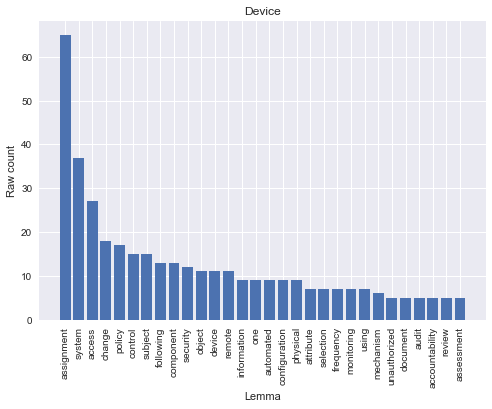

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in device_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in device_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts)
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Device")